# INTRADAY OPTION VALUES AND GREEKS

In this notebook I show how you can analyse Vanilla European Call and Put Equity options

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from financepy.utils import *
from financepy.products.equity import EquityVanillaOption
from financepy.market.curves import DiscountCurveFlat
from financepy.models.black_scholes import *

In [22]:
set_date_format(DateFormatTypes.DATETIME)

## Creating the Option

We need to set up the option details - what you would find in the Term Sheet.

Option expires at 11am

In [23]:
expiry_date = Date(5, 1, 2021, 11, 0, 0)

In [24]:
strike_price = 100.0

We now create the option object

In [25]:
call_option = EquityVanillaOption(expiry_date, strike_price, OptionTypes.EUROPEAN_CALL)

## Valuation Dates

In [26]:
start_date = Date(1, 1, 2021)

In [27]:
expiry_date - start_date

4.458333333335759

In [28]:
hoursToExpiry = int((expiry_date - start_date) * 24)

In [29]:
hoursToExpiry

107

In [30]:
value_dates = []
times = []

nextValuationDate = start_date

for i in range(0, hoursToExpiry):
    nextValuationDate = nextValuationDate.add_hours(1)
    value_dates.append(nextValuationDate)
    time = (nextValuationDate - start_date) * 24
    times.append(time)

## Valuations

To do a valuation we need to specify the date and set the market inputs

In [31]:
stock_price = 98.0
dividend_yield = 0.02
interest_rate = 0.05

In [32]:
volatility = 0.20
model = BlackScholes(volatility)

For simplicity the discount curve is assumed to be flat here (we can pass in any discount curve) and is created as follows.

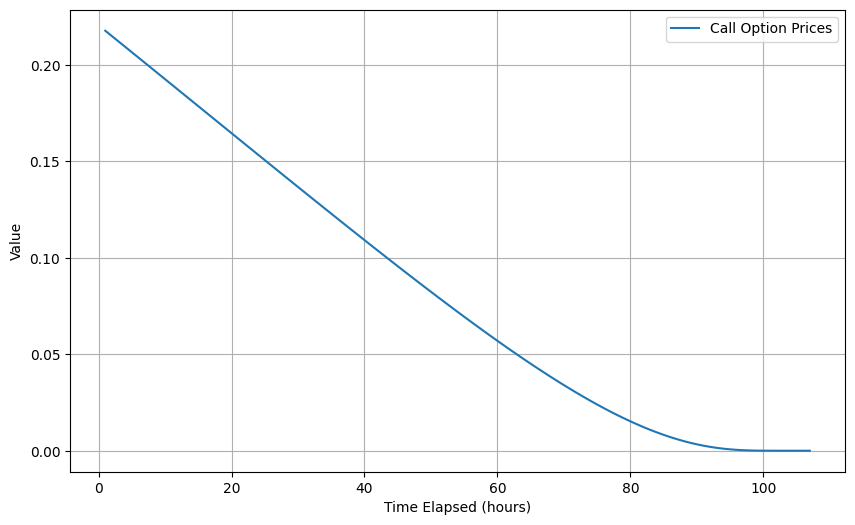

In [33]:
values = []
intTimes = []

for value_date in value_dates:
    discount_curve = DiscountCurveFlat(value_date, interest_rate, FrequencyTypes.ANNUAL)
    dividend_curve = DiscountCurveFlat(value_date, dividend_yield)
    call_value = call_option.value(value_date, stock_price, discount_curve, dividend_curve, model)
    values.append(call_value)
    t = call_option._t_exp
    intTimes.append(t)

plt.figure(figsize=(10,6))
plt.plot(times, values, label="Call Option Prices")
plt.xlabel("Time Elapsed (hours)")
plt.ylabel("Value")
plt.legend()
plt.grid()

# Risk Sensitivities

## Delta

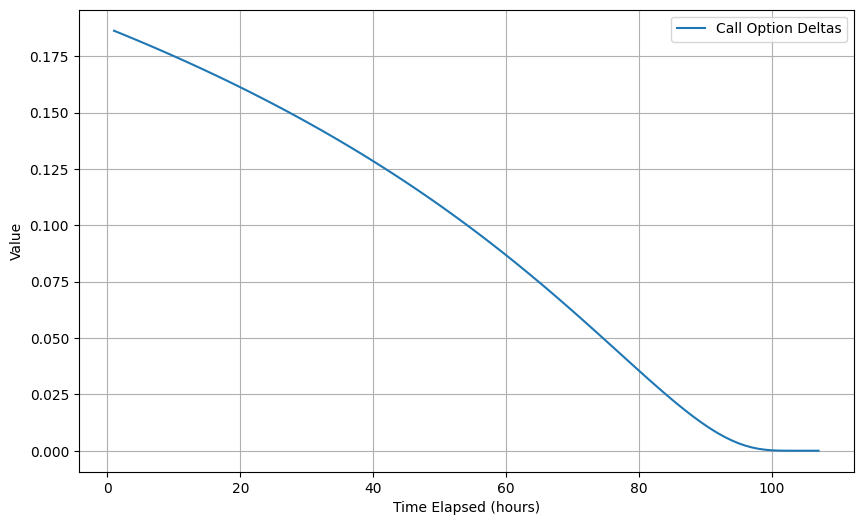

In [34]:
values = []

for value_date in value_dates:
    discount_curve = DiscountCurveFlat(value_date, interest_rate, FrequencyTypes.ANNUAL)
    dividend_curve = DiscountCurveFlat(value_date, dividend_yield)
    delta = call_option.delta(value_date, stock_price, discount_curve, dividend_curve, model)
    values.append(delta)
    
plt.figure(figsize=(10,6))
plt.plot(times, values, label="Call Option Deltas")
plt.xlabel("Time Elapsed (hours)")
plt.ylabel("Value")
plt.legend()
plt.grid()

## Gamma

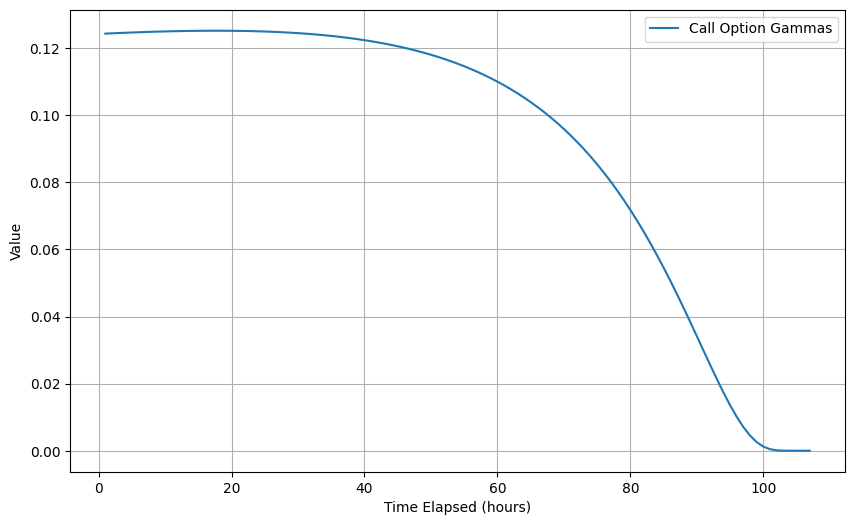

In [35]:
values = []
for value_date in value_dates:
    discount_curve = DiscountCurveFlat(value_date, interest_rate, FrequencyTypes.ANNUAL)
    dividend_curve = DiscountCurveFlat(value_date, dividend_yield)
    call_value = call_option.gamma(value_date, stock_price, discount_curve, dividend_curve, model)
    values.append(call_value)
    
plt.figure(figsize=(10,6))
plt.plot(times, values, label="Call Option Gammas")
plt.xlabel("Time Elapsed (hours)")
plt.ylabel("Value")
plt.legend()
plt.grid()

## Vega

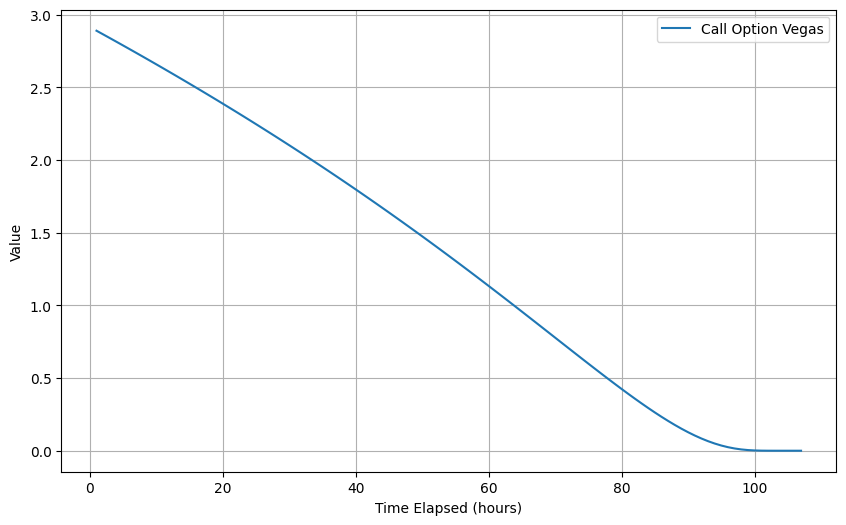

In [36]:
values = []
for value_date in value_dates:
    discount_curve = DiscountCurveFlat(value_date, interest_rate, FrequencyTypes.ANNUAL)
    dividend_curve = DiscountCurveFlat(value_date, dividend_yield)
    call_value = call_option.vega(value_date, stock_price, discount_curve, dividend_curve, model)
    values.append(call_value)
    
plt.figure(figsize=(10,6))
plt.plot(times, values, label="Call Option Vegas")
plt.xlabel("Time Elapsed (hours)")
plt.ylabel("Value")
plt.legend()
plt.grid()

## Theta

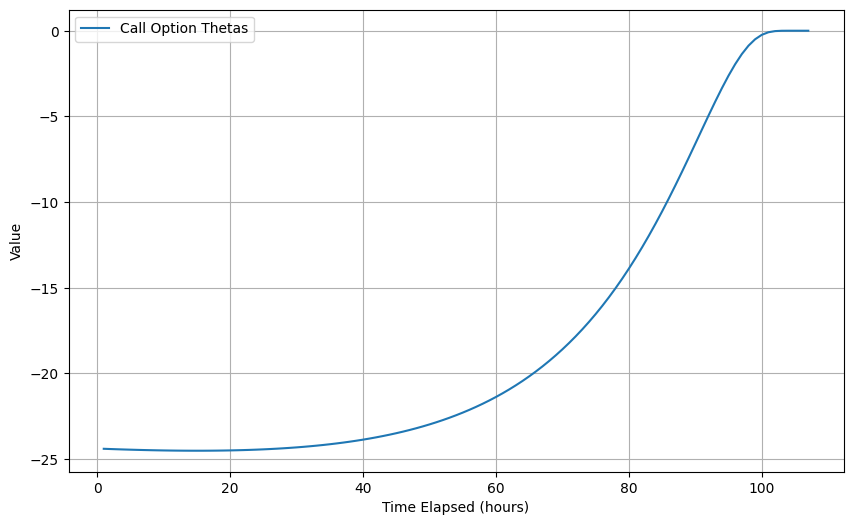

In [37]:
values = []
for value_date in value_dates:
    discount_curve = DiscountCurveFlat(value_date, interest_rate, FrequencyTypes.ANNUAL)
    dividend_curve = DiscountCurveFlat(value_date, dividend_yield)
    call_value = call_option.theta(value_date, stock_price, discount_curve, dividend_curve, model)
    values.append(call_value)
    
plt.figure(figsize=(10,6))
plt.plot(times, values, label="Call Option Thetas")
plt.xlabel("Time Elapsed (hours)")
plt.ylabel("Value")
plt.legend()
plt.grid()

## Rho

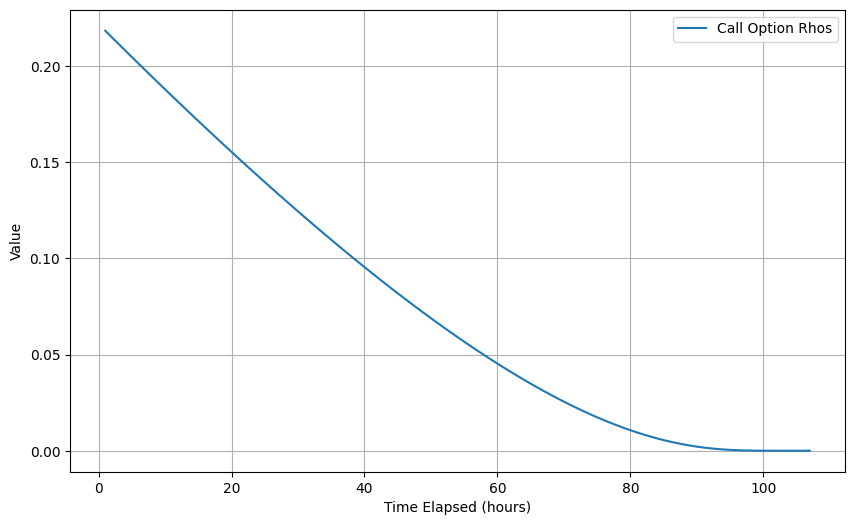

In [38]:
values = []
for value_date in value_dates:
    discount_curve = DiscountCurveFlat(value_date, interest_rate, FrequencyTypes.ANNUAL)
    dividend_curve = DiscountCurveFlat(value_date, dividend_yield)
    call_value = call_option.rho(value_date, stock_price, discount_curve, dividend_curve, model)
    values.append(call_value)
    
plt.figure(figsize=(10,6))
plt.plot(times, values, label="Call Option Rhos")
plt.xlabel("Time Elapsed (hours)")
plt.ylabel("Value")
plt.legend()
plt.grid()

Copyright (c) 2019, Dominic O'Kane 